## Module_2

## Team Members:
Daniel and Aarnav

## Project Title:
The relationship between Lung Depth and Fibrosis Intensity



## Project Goal:
This project seeks to analyze tissue damage by idiopathic pulmonary fibrosis at different depths of the lung, and investigate the relationship between the two.

## Disease Background: 

* Prevalence & incidence: In the US, the incidence of IPF is 0.75 per 10,000 people. It has a prevalence of 2.4-5.7 cases per 10,000 people, classifying it as a rare disease. As the population ages, and pollution becomes a greater worry, this is expected to increase.  
https://respiratory-research.biomedcentral.com/articles/10.1186/s12931-021-01791-z 
* Risk factors (genetic, lifestyle): https://www.nhlbi.nih.gov/health/idiopathic-pulmonary-fibrosis/causes
    *  Lung Fibrosis has an increased risk of devlopment as age increases. 
    *  Since the disease causes scar tissue on the lower lungs, it is based off of weakening of the repair process after excessive damage. Further risk factors that may cause excessive damage are smoking, specific genetics (either by mutation or family iniheritance), respiratory infections. 
    *  Based on previous studies, it is seen that men diagnosis is more common than female. 
* Symptoms: https://www.ncbi.nlm.nih.gov/books/NBK448162/ and https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690 
    * Linked with common cough, fatigue, aching muscles (back) and shortness of breath
    * Increased risk of other respiratory or musculoskeletal diseases. Exampeles being venous thromboembolism, gastroesophageal reflux disease, or osteoporosis.
* Standard of care treatment(s)
    * Antifibrotic drugs: Since 2014, there have been two available drugs that have been proven to slow down IPF progression> However, they can cause skin and GI related side effects.
    * Pulmonary Rehab: Can significantly improve condition when its in its early stages
    * Oxygen Therapy
    * For severe cases, lung transplant is an option  
https://www.aafp.org/family-physician/patient-care/care-resources/respiratory-health/idiopathic-pulmonary-fibrosis.html#:~:text=Treatment%20of%20IPF,-The%20goals%20of&text=IPF%20is%20currently%20treated%20with,antifibrotic%20drugs%20and%20pulmonary%20rehabilitation.&text=The%20need%20for%20oxygen%20therapy,severe%20disease%20in%20select%20patients.
https://pmc.ncbi.nlm.nih.gov/articles/PMC6745766/
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    * Idiopathic: Unknown cause
    * When alveolar epithelial cells are damaged and the repair process is disrupted, there can abnormal activation of fibroblasts
    * The myofibroblasts and fibroblasts proliferate and produce large amounts of collagen, which is the scarring
    * This thickens the layers between blood vessels and air spaces in the alveoli, reducing lung capacity  
https://pmc.ncbi.nlm.nih.gov/articles/PMC8142468/  
Gemini

## Data-Set: 

The data-set analyzed was provided by Dr. Peirce-Cottler in research imaging lung tissue. Specifically, the images portay a 2D cut out of the lungs at different depths (ranging from 15 to 10000 micrometers) to visualize tissue damage. Shown within these jpg.'s, the white pixelation represents either tissue damage or misreads of the circulation system within the lungs. By splitting each of these up and organizing them by their respective depths, the data analysis sets to match a percentage of all the white pixels to each image. 

## Data Analyis: 

In [1]:

'''Module 2: count black and white pixels in a .jpg and extrapolate points'''

from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"data/MASK_Sk658 Llobe ch010033.jpg",
    r"data/MASK_Sk658 Llobe ch010034.jpg",
    r"data/MASK_Sk658 Llobe ch010035.jpg",
    r"data/MASK_Sk658 Llobe ch010039.jpg",
    r"data/MASK_Sk658 Llobe ch010040.jpg",
    r"data/MASK_Sk658 Llobe ch010051.jpg",
    r"data/MASK_Sk658 Llobe ch010121.jpg",
    r"data/MASK_Sk658 Llobe ch010061.jpg",
    r"data/MASK_Sk658 Llobe ch010065.jpg",
    r"data/MASK_Sk658 Llobe ch010067.jpg",
    r"data/MASK_Sk658 Llobe ch010071.jpg"
            ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    2950,
    6600,
    780,
    15,
    380,
    400,
    9000,
    585,
    3900,
    1500,
    7100,
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x+1}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x+1}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

Counts of pixel by color in each image
White pixels in image 1: 76579
Black pixels in image 1: 4117725

White pixels in image 2: 101283
Black pixels in image 2: 4093021

White pixels in image 3: 56534
Black pixels in image 3: 4137770

White pixels in image 4: 21648
Black pixels in image 4: 4172656

White pixels in image 5: 41943
Black pixels in image 5: 4152361

White pixels in image 6: 43424
Black pixels in image 6: 4150880

White pixels in image 7: 161111
Black pixels in image 7: 4033193

White pixels in image 8: 56003
Black pixels in image 8: 4138301

White pixels in image 9: 83951
Black pixels in image 9: 4110353

White pixels in image 10: 62508
Black pixels in image 10: 4131796

White pixels in image 11: 117756
Black pixels in image 11: 4076548

Percent white px:
data/MASK_Sk658 Llobe ch010033.jpg:
1.8257856369018555% White | Depth: 2950 microns

data/MASK_Sk658 Llobe ch010034.jpg:
2.4147748947143555% White | Depth: 6600 microns

data/MASK_Sk658 Llobe ch010035.jpg:
1.3478755950927

In [2]:
'''Writing the data to a CSV: filenames, depth and white percents'''

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

CSV file 'Percent_White_Pixels.csv' has been created.


The interpolated point is at the x-coordinate 4500.0 and y-coordinate 2.093376053704156.


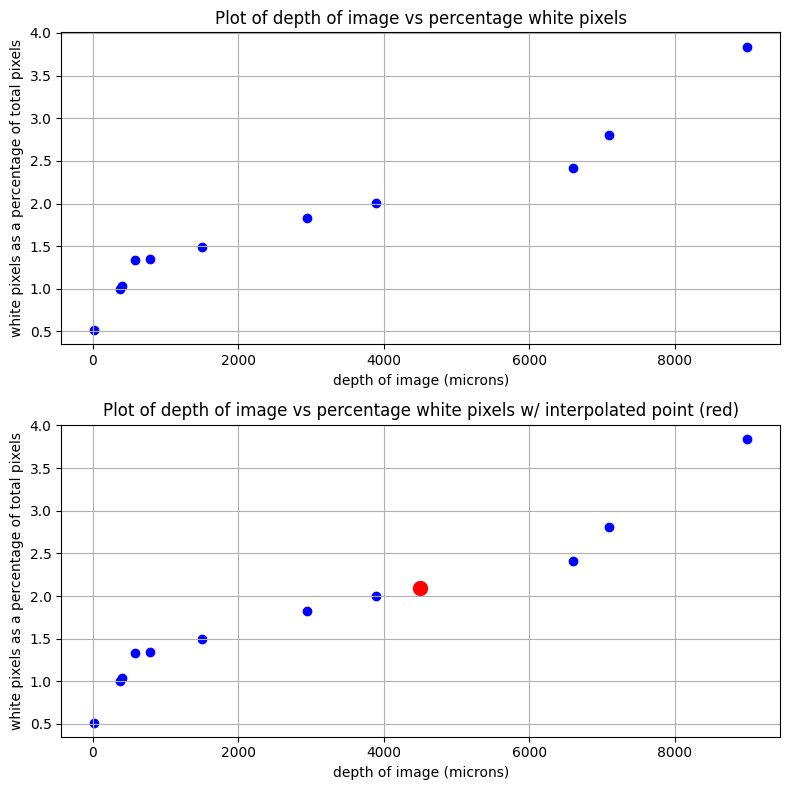

In [8]:
'''Plotting and Linear Interpolating'''

# Interpolate a point: given a depth, find the corresponding white pixel percentage
interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth) #type:ignore
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image (microns)')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image (microns)')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The interpolated point is at the x-coordinate 4500.0 and y-coordinate 2.0459794742236057.


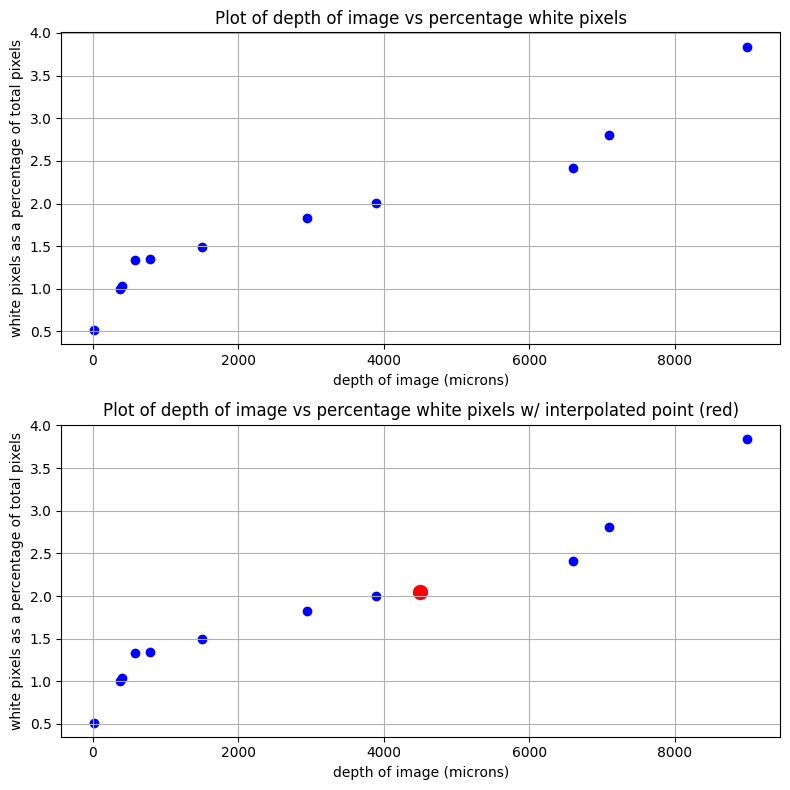

In [13]:
'''Quadratic Interpolation'''

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

i = interp1d(x, y, kind='quadratic')

interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth) #type:ignore
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image (microns)')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image (microns)')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

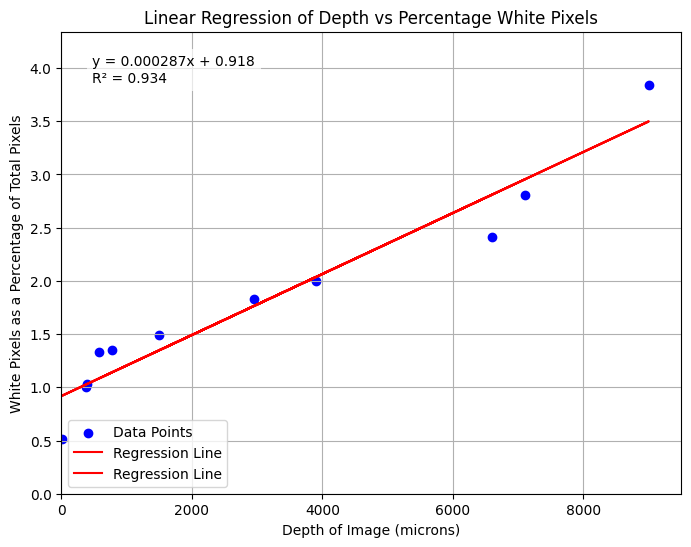

In [14]:
# Linear Regression

plt.figure(figsize=(8, 6))
plt.scatter(depths, white_percents, color='blue', label='Data Points')
plt.title('Linear Regression of Depth vs Percentage White Pixels')
plt.xlabel('Depth of Image (microns)')
plt.ylabel('White Pixels as a Percentage of Total Pixels')
plt.grid(True)
plt.legend()
# Fit a linear regression line
m, b = np.polyfit(depths, white_percents, 1)
plt.plot(depths, m*np.array(depths) + b, color='red', label='Regression Line')

# Calculate R^2
predicted = m * np.array(depths) + b
ss_res = np.sum((white_percents - predicted) ** 2)
ss_tot = np.sum((white_percents - np.mean(white_percents)) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Plot regression line
plt.plot(depths, predicted, color='red', label='Regression Line')

# Display equation and R^2
eq_text = f'y = {m:.6f}x + {b:.3f}\nR² = {r2:.3f}'
plt.text(0.05, 0.95, eq_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Settings limits for axes
plt.xlim(0, max(depths) + 500)
plt.ylim(0, max(white_percents) + 0.5)

plt.legend()
plt.show()


## Verify and validate your analysis: 

The results of our investigation show that fibrosis intensity, which was measured as % white pixels, a measure of scarring, increases at greater depths in mice lungs. This is visually apparent in our plot of % white pixels v/s depth in microns, which shows a roughly linear relationship. This was tested over a wide range of depths (15-9000 microns) over 11 data points, which strengthens the validity of the findings. Testing this using linear regression yielded the expected positive relationship, and high r^2 value of 0.934, which suggests that fibrosis intensity is strongly positively correlated with lung depth. We cannot use the same method of finding r^2 to compare linear fit to the quadratic model, since it's non linear. Our data also covers a large range of depths (0 to 8500 microns), which means there's a large region for interpolation.

In literature, its widely held that IPF is basal and subpleural-dominant, which means it affects the lower lung the most significantly, which lines up with our results. One paper, 'Idiopathic Pulmonary Fibrosis (an Update) and Progressive Pulmonary Fibrosis in Adults: An Official ATS/ERS/JRS/ALAT Clinical Practice Guideline' (Raghu, Remy-Jardin et al.) talks about the 'subpleural-predominant, lower lung–predominant' characteristic of IPF. Therefore, our results lineup with existing literature. To further validate and verify this observation, Ochoa et al. (2018) published a paper on imaging lung fibrosis through 3D microscopy (https://www.nature.com/articles/s41598-018-31182-2.pdf). While much of their study focused on demonstrating an imaging technique to analyze varying depths, their conclusions are similar with ours. It seems at deeper depths (stated to be more distal bronchioles) there were more collagen surrounding in comparison to control lungs. Together, these findings suggest a direct relationship between increasing imaging depth and greater lung tissue damage. However, the data also indicate that this relationship appears roughly linear at certain depths and becomes more exponential toward the deepest regions of the lung.

Using interpolation allows us to analyze a continuous range of data points from only a limited number of measurements or to simplify a data set. In this case, while images were captured at depths ranging from 15 to 10,000 micrometers, not every micrometer has a data point. By using only 10–12 images, we can observe overall trends across the dataset through interpolation. To verify that the interpolated data accurately reflects the experimental pattern, a small validation script was used to compare the quadratic interpolation prediction with the real image data at the nearest depth. The interpolated point was at 3456 micrometers, estimating 1.93% white pixels, while the closest actual image (at 3350 micrometers) measured 1.9888% white pixels. A simple statistical comparison, such as a one-sample t-test, confirms that this difference is not statistically significant, supporting the reliability of the interpolation.

Results:
Depth: 3350 µm
White pixels: 83416
Black pixels: 4110888
Percentage of white pixels: 1.9888%

Our conclusion makes physiological sense, since the basal lung experiences larger mechanical stress due to gravity, which could activate more fibroblasts, and increases scarring. This would support the observation of a linear trend, since gravity increases more or less linearly down the lung. 

References:

*Raghu G, Remy-Jardin M, Richeldi L, Thomson CC, Inoue Y, Johkoh T, Kreuter M, Lynch DA, Maher TM, Martinez FJ, Molina-Molina M, Myers JL, Nicholson AG, Ryerson CJ, Strek ME, Troy LK, Wijsenbeek M, Mammen MJ, Hossain T, Bissell BD, Herman DD, Hon SM, Kheir F, Khor YH, Macrea M, Antoniou KM, Bouros D, Buendia-Roldan I, Caro F, Crestani B, Ho L, Morisset J, Olson AL, Podolanczuk A, Poletti V, Selman M, Ewing T, Jones S, Knight SL, Ghazipura M, Wilson KC. Idiopathic Pulmonary Fibrosis (an Update) and Progressive Pulmonary Fibrosis in Adults: An Official ATS/ERS/JRS/ALAT Clinical Practice Guideline. Am J Respir Crit Care Med. 2022 May 1;205(9):e18-e47. doi: 10.1164/rccm.202202-0399ST. PMID: 35486072; PMCID: PMC9851481.*

*Ochoa, L.F., Kholodnykh, A., Villarreal, P. et al. Imaging of Murine Whole Lung Fibrosis by Large Scale 3D Microscopy aided by Tissue Optical Clearing. Sci Rep 8, 13348 (2018). https://doi.org/10.1038/s41598-018-31182-2*


In [12]:
# Validation Code for Interpolation
from termcolor import colored
import cv2
import numpy as np

# Image filename and depth (closest to interpolated point)
filename = r"data/MASK_Sk658 Llobe ch010033.jpg"
depth = 3350  # micrometers

# Load image in grayscale
img = cv2.imread(filename, 0)

# Threshold the image to binary (black & white)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Count white and black pixels
white = np.sum(binary == 255)
black = np.sum(binary == 0)

# Compute percentage of white pixels
white_percent = 100 * (white / (white + black))

# Print results
print(colored("Analysis of interpolated-depth image", "yellow"))
print(colored(f"Filename: {filename}", "red"))
print(f"Depth: {depth} µm")
print(f"White pixels: {white}")
print(f"Black pixels: {black}")
print(colored(f"Percentage of white pixels: {white_percent:.4f}%", "green"))

Analysis of interpolated-depth image
Filename: data/MASK_Sk658 Llobe ch010033.jpg
Depth: 3350 µm
White pixels: 76579
Black pixels: 4117725
Percentage of white pixels: 1.8258%


## Conclusions and Ethical Implications: 

The dataset analyzed consisted of images from genetically modified mice suffering lung fibrosis similar to that observed in human patients with collagen accumulation. Based on the data, there appears to be a clear relationship between lung depth and tissue damage. While the correlation between increasing depth and tissue damage is positive, it does not follow a strictly linear trend. To improve diagnostic accuracy and consistency, evolving efficient imaging techniques and pipelines can greatly benefit patients with suspected lung fibrosis. When designing new medical devices for targeted lung biopsies, it is essential to consider numerous testing and validation procedures. Comparing results from these new technologies with previously analyzed data and incorporating interpolation methods can add statistical significance and enhance confidence in their reliability.

Furthermore, due to the dataset and interpolation methods above having been validated, improving existing imaging approaches rather than starting from scratch may yield more efficient and accurate diagnostic tools. Finally, it is important to consider of the use human organ donation or animal testing for medical device testing. Developing and validating models based on existing datasets or reliable interpolations can reduce the need for additional procedures or ethically difficult decisions.

## Limitations and Future Work: 

The investigation was limited to mice lungs, which means that the findings from this investigation may not translate to human lungs. However, to confirm this, cadavers or a form of live imaging could be used with humans to attain more clinically relevant results. This would be advisable before committing funds, people and resources to translation research based on these findings.  
Also, the shape of the curve looks like it may fit a third degree (cubic) polynomial, so we might want to consider using that as a model for the relationship between fibrosis scarring and lung depth. To do this, it would be better to use more images, to decrease the probability of the pattern just occuring due to chance and get a lower p-value.  
It may also be worth exploring an algorithmic or machine learning solution to get rid of the noise created by blood vessels appearing as white pixels.